In [46]:
import numpy as numpy
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
tracks = pd.read_csv("data/tracks.tsv", sep="\t", dtype={"track_id": str})
echonest = pd.read_csv("data/echonest_features.tsv", sep="\t", dtype={"track_id": str})
spectral = pd.read_csv("data/spectral_features.tsv", sep="\t", dtype={"track_id": str})
genres = pd.read_csv("data/genres.csv")


In [48]:
print("tracks_columns :", tracks.columns)
print("echonest_columns :", echonest.columns)
print("spectral_columns :", spectral.columns)   
print("genres_columns :", genres.columns)

tracks_columns : Index(['track_id', 'album_title', 'album_tracks', 'artist_latitude',
       'artist_longitude', 'artist_name', 'duration', 'favorites', 'genre_top',
       'genres', 'genres_all', 'interest', 'listens', 'title'],
      dtype='object')
echonest_columns : Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')
spectral_columns : Index(['track_id', 'spectral_bandwidth_kurtosis_01',
       'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01',
       'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01',
       'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01',
       'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01',
       'spectral_centroid_mean_01', 'spectral_centroid_median_01',
       'spectral_centroid_min_01', 'spectral_centroid_skew_01',
       'spectral_centroid_std_01', 'spectral_rolloff_kurtosis_01',
       'spectral_rolloff_max_01',

In [49]:
def clean_cols(df):
    df.columns = (df.columns
                    .str.lower()
                    .str.strip()
                    .str.replace(" ", "_")
                    .str.replace("-", "_")
                    .str.replace(r"[^a-zA-Z0-9_]", "", regex=True))
    return df
        
tracks = clean_cols(tracks)
echonest = clean_cols(echonest)
spectral = clean_cols(spectral)
genres = clean_cols(genres)


In [50]:
df = tracks.merge(echonest, on="track_id", how="left") \
           .merge(spectral, on="track_id", how="left")


In [51]:
#df.to_csv("tracks_merged.csv", index=False) # Les 3 fichiers merged 

In [52]:
#Création de colonnes pour les genres

genres_df = pd.read_csv("data/genres.csv")

genres_df = genres_df.rename(columns={
    "genre_id": "id",
    "genre_title": "name"
})

# dictionnaire : id -> nom
id_to_name = dict(zip(genres_df["id"], genres_df["name"]))




In [53]:
type(df.loc[0, "genres"])


str

In [54]:
df["genres"] = df["genres"].apply(ast.literal_eval)
df["genres_all"] = df["genres_all"].apply(ast.literal_eval)


In [55]:
def ids_to_names(id_list):
    return [id_to_name.get(i, "UNKNOWN") for i in id_list]


In [56]:
df["genres_names"] = df["genres"].apply(ids_to_names)
df["genres_all_names"] = df["genres_all"].apply(ids_to_names)


In [57]:
df[["genre_top", "genres_names", "genres_all_names"]].head()


,genre_top,genres_names,genres_all_names
0,Hip-Hop,[Hip-Hop],[Hip-Hop]
1,Hip-Hop,[Hip-Hop],[Hip-Hop]
2,Hip-Hop,[Hip-Hop],[Hip-Hop]
3,Hip-Hop,[Hip-Hop],[Hip-Hop]
4,Hip-Hop,[Hip-Hop],[Hip-Hop]


In [58]:
df.to_csv("genres_named.csv", index=False) #merge de df mais avec les noms de genre

Numerical Variables Summary:
                    count         mean           std           min  \
album_tracks      99995.0    19.908645     40.510849 -1.000000e+00   
artist_latitude   40207.0    39.967832     18.766913 -4.587450e+01   
artist_longitude  40207.0   -35.443236     65.670545 -1.575269e+02   
duration          99995.0   278.034522    294.940279  0.000000e+00   
favorites         99995.0     3.239962     13.863871  0.000000e+00   
interest          99995.0  3628.631112  19578.522967  2.000000e+00   
listens           99995.0  2403.072944   8234.085292  0.000000e+00   
acousticness      10553.0     0.489379      0.384781  9.491000e-07   
danceability      10534.0     0.506784      0.189812  5.143514e-02   
energy            10553.0     0.541650      0.274799  2.028170e-05   
instrumentalness  10553.0     0.628853      0.366879  0.000000e+00   
liveness          10553.0     0.185575      0.153461  2.591638e-02   
speechiness       10408.0     0.098309      0.133848  2.23236

C:\Users\kraif\AppData\Local\Temp\ipykernel_53784\3844622522.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="genre_top", data=df, order=df["genre_top"].value_counts().index, palette="viridis")


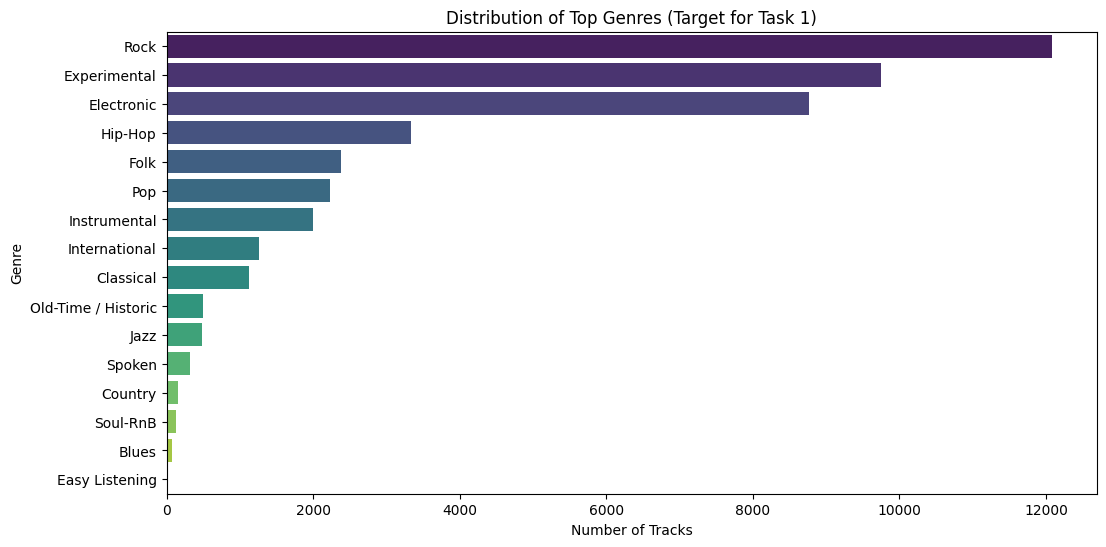

KeyError: 'track_duration'

<Figure size 1000x400 with 0 Axes>

In [59]:

# --- PART 3: UNI- AND MULTI-DIMENSIONAL STATISTICS ---


# 1. Descriptive Statistics for Numerical Variables
print("Numerical Variables Summary:")
print(df.describe().T.head(15)) 

# 2. Univariate Analysis: Target Variable 'genre_top' (Task 1)
# Objective: Check for Class Imbalance.
# If 'Rock' has 10,000 tracks and 'Blues' has 100, accuracy will be a misleading metric.
plt.figure(figsize=(12, 6))
sns.countplot(y="genre_top", data=df, order=df["genre_top"].value_counts().index, palette="viridis")
plt.title("Distribution of Top Genres (Target for Task 1)")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.show()

# 3. Univariate Analysis: Target Variable 'track_duration' (Task 3)
# Objective: Visualize distribution and identify outliers (e.g., 0s or very long tracks).
plt.figure(figsize=(10, 4))
sns.histplot(df["track_duration"], bins=50, kde=True, color="teal")
plt.title("Distribution of Track Duration (Target for Task 3)")
plt.xlabel("Duration (seconds)")
plt.xlim(0, 1000) # Limiting x-axis to zoom in on the main distribution
plt.show()

# 4. Multi-dimensional Analysis: Correlation Matrix
# We select only numeric columns to avoid errors.
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Filtering to focus on 'echonest' features and 'duration'
# (Adjust the string filter if your column names differ slightly)
cols_to_correlate = [c for c in numeric_cols.columns if "echonest" in c or "duration" in c]

if cols_to_correlate:
    plt.figure(figsize=(12, 10))
    corr_matrix = df[cols_to_correlate].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Matrix (Audio Features vs Duration)")
    plt.show()

# 5. Cross Analysis: Genre vs Duration
# Objective: Determine if specific genres have distinct duration patterns (e.g., Punk vs Classical).
plt.figure(figsize=(14, 6))
sns.boxplot(x="genre_top", y="track_duration", data=df, order=df["genre_top"].value_counts().index)
plt.title("Track Duration by Genre")
plt.xticks(rotation=45)
plt.ylim(0, 800) # Zooming in to ignore extreme outliers for better readability
plt.show()

print("Statistical analysis complete.")